In [1]:
import keras
keras.__version__

'2.4.3'

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on. Some example digits:
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" alt="MNIST examples of handwritten digits">

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
# Note that the shape here reflects that we have 60,000 training images and
# each image is 28x28 pixels.
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
# each image has a label indicating what handwritten number is written in it
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [6]:
# 10,000 images of 28x28 pixels
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Finally, let's see how to display an image:

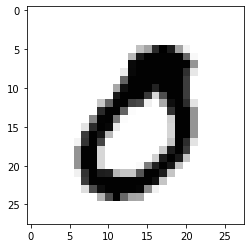

In [9]:
import matplotlib.pyplot as plt

# imshow() is a matplotlib method that displays an image, treating each element
# of the input matrix as a pixel where the value indicates a colour value.
# In this case we are mapping to grayscale, but multiplying by -1 to invert
# black and white.
plt.imshow(train_images[75] * -1, cmap='gray');

In [10]:
# as this output shows, the image at position 75 (the 76th image), is a 0.
# The label number for the dataset corresponds to the digit represented, so a
# label of 5 means the image shows a 5, a 6 means a 6, and so on.
train_labels[300]

8

Our workflow will be as follows: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [ ]:
network.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0024 - accuracy: 0.9993
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 7.7502e-04 - accuracy: 0.9998
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 6.2168e-04 - accuracy: 0.9999
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 6.0796e-04 - accuracy: 0.9998
Epoch 9/15
469/469 [==============================] - 4s 7ms/step - loss: 3.2017e-04 - accuracy: 0.9999
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 2.7785e-0

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9800


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9800000190734863



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 
Overfitting will be a central topic in chapter 3.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. In the next chapter, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which 
layers are made of, and about gradient descent, which allows our network to learn from its training examples.

# **Lab Questions**

---

**1. What does the output of the cell below tell us?** (1 Mark)

In [ ]:
train_labels[300]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

Answer: It tells us that datapoint with index 300 is a 8

**2. Why does the last layer of the network we trained above have 10 nodes? Why does it have to have that many?** (1 Mark)


Answer: This is because we have a classification task with 10 different classes. Each output node, corelates with the probability of the input being that output class.

---


**3. How many nodes does the input layer have? Why does it have to have that many?** (1 Mark)


Answer: It has 784 nodes becuase that is the number of pixels in the input image.

---


**4. How Many nodes does the hidden layer have? Could it have had a different number? (hint: try it out)** (1 Mark)

Answer: It has 512 nodes. Yes it can have a differnt number of nodes.

---

**5. Train the model we trained above for another 5 [epochs](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) (Note, an epoch is a single iteration over all samples in the dataset). Does the model improve from the additional training?** (1 Mark)

hint: you can do this by re-running the training cell, but note that the previous output will be cleared.

Answer: Yes it improves. The accuracy increases on both the training and test sets.

---



In class we have discussed gradient descent. Gradient descent is the fundamental optimization method for neural networks, but there are more advanced optimization techniques that build on it, such as rmsprop (which was used in the model we trained above). Don't worry about understanding these advanced optimizers for this course - just remember that they exist and are serving the same role as gradient descent, but with some modifications.

**6. Modify the code below so that it uses stochastic gradient descent as the optimizer instead of rmsprop. Which results in better performance on this dataset after 5 epochs, SGD or rmsprop? How do you know?** (2 Marks)

hint: use 'sgd' to indicate stochastic gradient descent in the code. Also make sure you calculate the **test** accuracy after training.

Answer: rmsprop produced a better model based on the accuracy on the test set.


In [ ]:
#The network is identical to the one we trained above. Change it to use
# stochastic gradient descent ('sgd').
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 1.5467 - accuracy: 0.6167
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5657 - accuracy: 0.8694
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4330 - accuracy: 0.8887
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3794 - accuracy: 0.8987
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3510 - accuracy: 0.9060


In [ ]:
network2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.9149


[0.3160744309425354, 0.914900004863739]



---


Our data is stored in Numpy arrays. In general, neural networks use data that is stored in Tensors, which is a term for a container for numbers. Unlike a vector (which is a 1 dimensional tensor) or matrix (2D tensor), a tensor can have an arbitrary number of dimensions. In working with Keras in this course, our tensors are Numpy arrays with a varying number of dimensions.

**7. What dimension tensors are our train_labels and train_images variables?** (1 mark)

Answer: They are both 2 dimensions

---

**8. Create a new neural network with between 2 and 4 hidden layers, and fewer than 256 nodes per layer. Report the training and test accuracy after 3 and 5 epochs of training respectively. Also report the number of layers and number of nodes per layer that you used to acheive these results.** (4 marks)

If you want, you are welcome to experiment with other aspects of the network such as optimizers (e.g. 'adam') or different activation functions (e.g. sigmoid).

Answer: After 3 epochs training accuracy was 97.7% and test was 98.2%. And after 5 epochs training accuracy was 98.9% and tes was 97.7%. I used 2 hidden layers with 250 nodes each.

---

**9. Imagine you have designed a machine learning system for a bank. The system uses an aritifical neural network to decide whether to approve mortages based on client income, banking and credit history, and some demographic data such as gender, ethnic background and age. The network has many layers and over 2 million parameters (weights). A client is asking you why their desired mortgage was not approved by the system and they are accusing you of discrimination based on gender. What level of detail are you able to provide them in your response by simply looking at the values of your weights? Can you easily check whether your model is making decisions based on their gender? Why or why not?** (3 marks)

Answer: I cannot provide any detail by only looking at the weights because they interact with many other values as it propagates through the network this makes it very difficult to give an answer by just looking at the weights. I can easily check for this particular individual by simply changing only their geneder and feeding it to the network and see if it would have been approved.

In [ ]:
network.summary()
print(f"\nTrain Images Shape: {train_images.shape}. Train Labels Shape: {train_labels.shape}")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________

Train Images Shape: (60000, 784). Train Labels Shape: (60000, 10)


In [ ]:
network3 = models.Sequential()
network3.add(layers.Dense(250, activation='relu', input_shape=(28 * 28,)))
network3.add(layers.Dense(250, activation='relu'))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network3.fit(train_images, train_labels, epochs=3, batch_size=128)
network3.evaluate(test_images, test_labels)

Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 0.4818 - accuracy: 0.8645
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.1019 - accuracy: 0.9689
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9773


[0.07364468276500702, 0.9772999882698059]

In [ ]:
network3.fit(train_images, train_labels, epochs=2, batch_size=128)
network3.evaluate(test_images, test_labels)

Epoch 1/2
469/469 [==============================] - 3s 6ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9777


[0.07549607008695602, 0.9776999950408936]